In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!unzip drive/MyDrive/sasw/data/data1.zip
!unzip drive/MyDrive/sasw/data/data2.zip
!unzip drive/MyDrive/sasw/data/data3.zip

Archive:  drive/MyDrive/sasw/data/data1.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               
Archive:  drive/MyDrive/sasw/data/data2.zip
  inflating: Fake.csv                
  inflating: True.csv                
Archive:  drive/MyDrive/sasw/data/data3.zip
  inflating: fake_or_real_news.csv   


In [1]:
from DataLoader import DataLoader
from Model import Model

ROOT = "data/"
# datasets = ["data1", "data2", "data3"]
datasets = ["data3"]

dataset = DataLoader(ROOT, datasets)
dataset.dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Loading datasets...
Loading from: data/data3/fake_or_real_news.csv
Loaded: 65 rows

Total loaded 5 rows

Cleaning dataset...


  0%|          | 0/65 [00:00<?, ?it/s]/content/DataLoader.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset["clean_words"][i] = self.Preprocess("{} {}".format(self.dataset["title"][i], self.dataset["text"][i]))
/content/DataLoader.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset["clean"][i] = " ".join(self.dataset["clean_words"][i])
100%|██████████| 65/65 [00:00<00:00, 527.29it/s]

DATASET: train 0.7 test 0.3


,title,text,label,clean_words,clean
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"[smell, hillary, fear, daniel, greenfield, shi...",smell hillary fear daniel greenfield shillman ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,"[watch, exact, moment, paul, ryan, committed, ...",watch exact moment paul ryan committed politic...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,"[kerry, paris, gesture, sympathy, secretary, s...",kerry paris gesture sympathy secretary state j...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"[bernie, supporters, twitter, erupt, anger, tr...",bernie supporters twitter erupt anger tried wa...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,"[battle, york, primary, matters, primary, york...",battle york primary matters primary york runne...
...,...,...,...,...,...
60,Detroit women’s Halloween decorations depict ‘...,Print \n[Ed. – How to take the fun out of Hall...,0,"[detroit, women, halloween, decorations, depic...",detroit women halloween decorations depict rea...
61,Biden makes another surprise political stop,"On this day in 1973, J. Fred Buzhardt, a lawye...",1,"[biden, makes, surprise, political, stop, fred...",biden makes surprise political stop fred buzha...
62,Hillary Clinton's declining favorability numbe...,Buried beneath Wednesday's eye-popping headlin...,1,"[hillary, clinton, declining, favorability, nu...",hillary clinton declining favorability numbers...
63,Comment on Quid Pro Quo? Wikileaks Email Revea...,New Wikileaks email dumps have revealed massiv...,0,"[comment, quid, wikileaks, email, reveals, cli...",comment quid wikileaks email reveals clinton c...


In [2]:
for i,doc in enumerate(dataset.train_sequences[:2]):
     print("The padded encoding for document",i+1," is : ",doc[:100])

The padded encoding for document 1  is :  [  24   35  516  681  136   74   12   24   35 1338 1339 2171   23  136
  933  209 2172   20   15 1340 1341 2173  304  933 1342   59 2174   29
  682 1343  516  683  517 2175  681  136   75  518 2176   23   15 2177
  934   23   15  934  115  684   24   35  354 2178   15   24   35 1344
 2179  210  136  685   24   35  257  258  686   24   35  211 1345  419
  935    7  687   92  259  137   27 1346  355   59   27   62  688   59
 2180  936  519  520   59  937   23 2181 1347  260  261  136 1348   15
  938  689]
The padded encoding for document 2  is :  [  26 2456    2  740   92  102   26  741  381   51   11    2  575  100
   28  382  449  450  576  577    2 1001 2457 1002  115   26  232   18
   25  225 2458   26 1492  578 1493    2   16  579  225 2459   99 1003
 1004 2460   48    1  124  365    3    2 2461   73  171  742  743  580
  450  576    6  103 2462 1494  581 1495 2463 1495 1496  221 2464 1497
 2465  328   14 2466   26   86 1498   72    7    1  

In [3]:
model = Model(dataset)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model spawned
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         758656    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,054,849
Trainable params: 1,054,849
Non-trainable params: 0
_________________________________________________________________


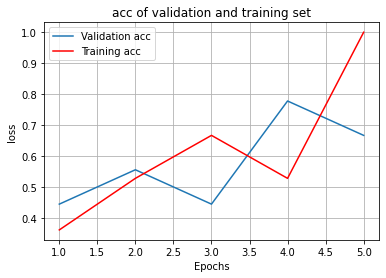

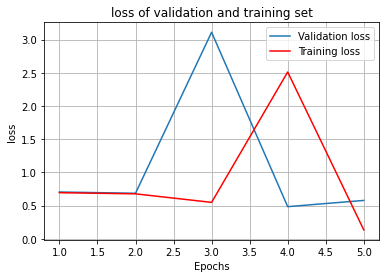

In [5]:
model.Train(5)
model.PlotScore("acc", None)
model.PlotScore("loss", None)